CS401, CA2  
Raphaël BRENA, 25181114, Erasmus  
# **CNNs**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

# **Task 1: Implementing a Standard CNN**

# Question A.

**The CIFAR-10 Dataset:**
The CIFAR-10 dataset consists of 60 000 32x32 color images in 10 classes, with 6 000 images per class. There are 50 000 training images and 10 000 test images.
* **Features:** Pixel values representing color intensity in RGB.
* **Target:** Integer labels 0-9 representing classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck).

**Normalization:** Pixel values range from 0 to 255. I will divide by 255 to scale them between 0 and 1 so the neural network can converge faster.

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print shape
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


# Question B.

For this **object classification task**, I propose a standard architecture similar to the one covered in the lectures. This is a sequential model that stacks convolutional layers followed by pooling layers.

**Architecture Design:**
* **Input Layer:** 32x32x3 (Image height, width, color channels).
* **Convolutional Blocks:**
    * `Conv2D` layers with 3 kernels and `ReLU` activation.
    * `Conv2D` layers with `MaxPooling2D`  to downsample the spatial dimensions, so it reduces computation and controls overfitting.
    * Pattern: Conv -> Pooling -> Conv -> Pooling -> Conv.
* **Dense Layers:**
    * `Flatten` layer to convert 2D feature maps to a 1D vector.
    * `Dense` layer with `ReLU` to combine features.
    * **Output Layer:** `Dense` layer with 10 units (one for each class) and **Softmax** activation to output probabilities.

In [3]:
def create_base_model():
    model = models.Sequential()

    # Block 1
    model.add(keras.Input(shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 3
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Classification Head
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

model = create_base_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Question C.

**Training Decisions:**
1.  **Optimizer: Adam.** I chose this adaptive learning rate optimization algorithm because it generally converges faster and requires less manual tuning of the learning rate compared to standard SGD.
2.  **Loss Function: Sparse Categorical Crossentropy.** Since the targets (`y_train`) are integers (0-9) rather than one-hot encoded vectors, this is the numerically stable choice.
3.  **Metrics: Accuracy.** I chose Accuracy beacuse it is the standard metric for classification tasks to interpret how many images were correctly identified.
4.  **Validation Split:** I'm using 20% of the training data as a validation set. This allows to monitor the model's performance on unseen data during training and check for overfitting.

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Fit the model using 10 epochs
history = model.fit(x_train, y_train, epochs=10,
                    validation_split=0.2,
                    batch_size=64)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3163 - loss: 1.8408 - val_accuracy: 0.5054 - val_loss: 1.3663
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5276 - loss: 1.3104 - val_accuracy: 0.5932 - val_loss: 1.1617
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6066 - loss: 1.1184 - val_accuracy: 0.6065 - val_loss: 1.1081
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6401 - loss: 1.0101 - val_accuracy: 0.6490 - val_loss: 1.0082
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6725 - loss: 0.9323 - val_accuracy: 0.6602 - val_loss: 0.9933
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7005 - loss: 0.8531 - val_accuracy: 0.6826 - val_loss: 0.9245
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7174 - loss: 0.8045 - val_accuracy: 0.6891 - val_loss: 0.9031
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7383 - loss: 0.7419 - val_accuracy: 0.

# Question D.

Below, I plotted the training and validation accuracy/loss.

**Interpretation:**  
* **Accuracy Plot:**
  * Both the training and validation accuracy are **increasing** steadily. It means the model is **successfully learning to distinguish between the 10 classes as it sees more data**.
  * After **10 epochs**, the training accuracy reaches approximately **75%**, while the validation accuracy is around **69%**.
  * There is a **small growing gap between the training and validation lines**. This indicates the beginning of **Overfitting**. The model is starting to become slightly better at identifying the specific images it has already seen than new images it hasn't seen before.
* **Loss Plot:**
    * **Both lines are decreasing**, which is what we want.
    * Around Epoch 4-5, **the orange validation loss line starts to flatten out**. While the training loss continues to drop sharply, the validation loss stays relatively stable between 0.9 and 1.0.
    * So this confirms the slight **overfitting** seen in the accuracy plot. The model is still getting better at the training data, but it has stopped making significant progress on generalizing to the validation data.


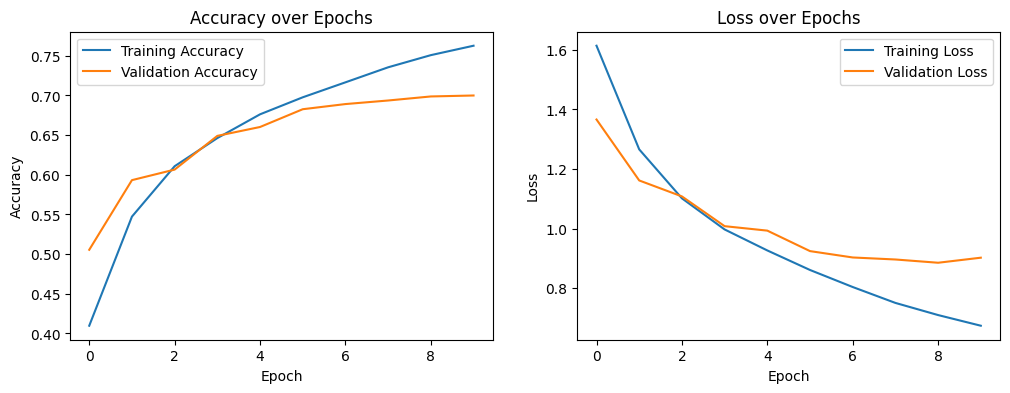

313/313 - 2s - 8ms/step - accuracy: 0.6969 - loss: 0.8997

Test Accuracy: 0.6969


In [5]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluation
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

# **Task 2: Experiment with architecture and parameters**

# Question A.

I doubled the number of layers by adding a second **Conv2D layer** before every **MaxPooling layer**.

**Results:** Increasing the depth of the network by doubling the convolutional layers resulted in a **performance boost of approximately 5%**. This indicates that the additional layers allowed the model to extract **more complex features from the images**. The deeper architecture provids a better balance between feature extraction and generalization for this dataset.

In [6]:
def create_deeper_model():
    model = models.Sequential()
    model.add(keras.Input(shape=(32, 32, 3)))
    # Block 1 (Double Conv)
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 2 (Double Conv)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

model_deep = create_deeper_model()
model_deep.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_deep = model_deep.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64, verbose=0)

print(f"Base Model Val Acc: {max(history.history['val_accuracy']):.4f}")
print(f"Deep Model Val Acc: {max(history_deep.history['val_accuracy']):.4f}")

Base Model Val Acc: 0.6999
Deep Model Val Acc: 0.7338


# Question B.
I changed the size of the kernel from 3x3 to 5x5.

It resulted in a **slight decrease in validation accuracy** (from 68.8% to 67.9%). I think it's because on the small 32x32 images of CIFAR-10, the larger 5x5 filters appear to be too coarse, potentially overlooking fine-grained spatial features.

In [7]:
model_k5 = models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_k5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_k5 = model_k5.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)

print(f"Kernel (5x5) Val Acc: {max(history_k5.history['val_accuracy']):.4f}")

Kernel (5x5) Val Acc: 0.6893


# Question C.

I tested two extreme learning rates:
1.  **Low (0.0001):** The model shows **consistent learning**, but the rate of improvement is much slower than the base model.
2.  **High (0.01):** The model **fails to converge**, resulting in a flat accuracy of approximately 10%, equivalent to a random guessing. This can indicate that the weight updates are too large, causing the optimizer to overstep the local minima.

In conclusion, **the default learning rate provides the best balance between speed and stability** for this architecture and dataset.

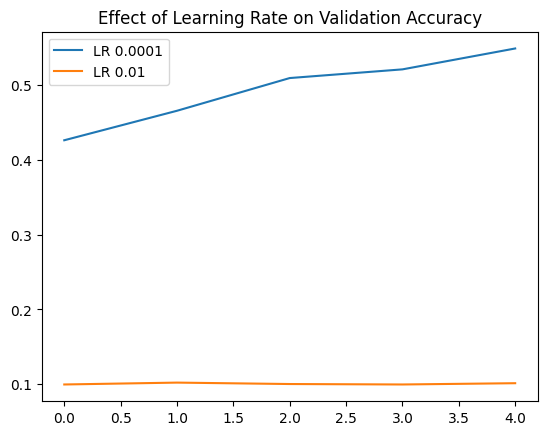

In [8]:
# Low Learning Rate
model_low = create_base_model()
opt_low = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_low.compile(optimizer=opt_low, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_low = model_low.fit(x_train, y_train, epochs=5, validation_split=0.2, verbose=0)

# High Learning Rate
model_high = create_base_model()
opt_high = tf.keras.optimizers.Adam(learning_rate=0.01)
model_high.compile(optimizer=opt_high, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_high = model_high.fit(x_train, y_train, epochs=5, validation_split=0.2, verbose=0)

plt.plot(hist_low.history['val_accuracy'], label='LR 0.0001')
plt.plot(hist_high.history['val_accuracy'], label='LR 0.01')
plt.title('Effect of Learning Rate on Validation Accuracy')
plt.legend()
plt.show()

# Question D.

I compared the **ReLU** and **Tanh** activation functions. While Tanh showed a slight advantage in the initial epochs, ReLU ultimately achieved higher validation accuracy (**69%**) compared to Tanh (**64%**).
* **ReLU:** Demonstrated more consistent growth and higher peak performance.
* **Tanh:** Performance plateaued and became less stable in later epochs.


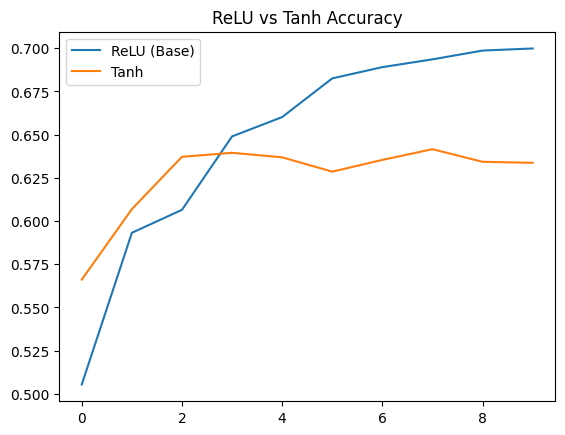

In [9]:
model_tanh = models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model_tanh.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_tanh = model_tanh.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)

plt.plot(history.history['val_accuracy'], label='ReLU (Base)')
plt.plot(hist_tanh.history['val_accuracy'], label='Tanh')
plt.legend()
plt.title("ReLU vs Tanh Accuracy")
plt.show()

# Question E.

I switched from **Adam** to **SGD**.  

**Result:** Adam outperformed SGD by nearly **9%**. This is because Adam uses **adaptive learning rates**, so it automatically adjusts the step size for each parameter, allowing it to navigate the loss landscape more efficiently.

In [10]:
model_sgd = create_base_model()
model_sgd.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_sgd = model_sgd.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)

print(f"Adam Val Acc: {max(history.history['val_accuracy']):.4f}")
print(f"SGD Val Acc: {max(hist_sgd.history['val_accuracy']):.4f}")

Adam Val Acc: 0.6999
SGD Val Acc: 0.6241


# Question F.

I tested batch sizes of **4**, **32**, and **256**.

**Batch Size 32:** Provids the **best performance**, reaching the **highest validation accuracy** (~61%). It offers an **optimal balance** between the frequency of weight updates and gradient stability.

**Batch Size 4:** Shows a **rapid initial climb** due to the high frequency of updates but became **unstable and plateaued quickly**. It is probably because the high level of noise in such small batches can hinder the model from converging on an optimal solution.

**Batch Size 256:** Demonstrats the **slowest learning rate**. It might require a higher learning rate or more epochs to match the generalization capabilities of smaller batches.

**Conclusion:** A moderate batch size (32) is most effective for the CIFAR-10 dataset, providing the best trade-off between training speed and final model accuracy.

Training with batch size: 4
Training with batch size: 32
Training with batch size: 256


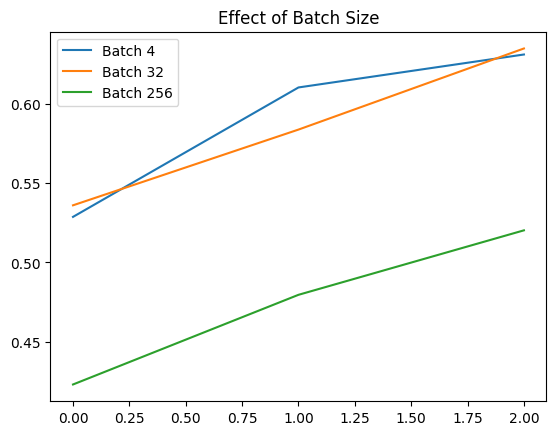

In [11]:
batch_sizes = [4, 32, 256]
histories = {}

for bs in batch_sizes:
    print(f"Training with batch size: {bs}")
    m = create_base_model()
    m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    h = m.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=bs, verbose=0)
    histories[bs] = h.history['val_accuracy']

for bs, acc in histories.items():
    plt.plot(acc, label=f'Batch {bs}')
plt.legend()
plt.title("Effect of Batch Size")
plt.show()

# Question G.
The images below visualize the output of the convolutional layers for a sample test image.

**Layer 1:**

We can easily recognize a bird in those images. The feature maps in this layer retain a high spatial resolution because early layers in a CNN function as edge and texture detectors.

**Layer 2:**

The images are becoming blockier and more abstract. As we move deeper, the network combines the low-level edges from the previous layer to detect parts of the object.

**Layer 3:**

The feature maps are now extremely low-resolution and some maps are entirely black. In deeper layers, the network represents high-level semantic concepts and looks for specific complex patterns.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


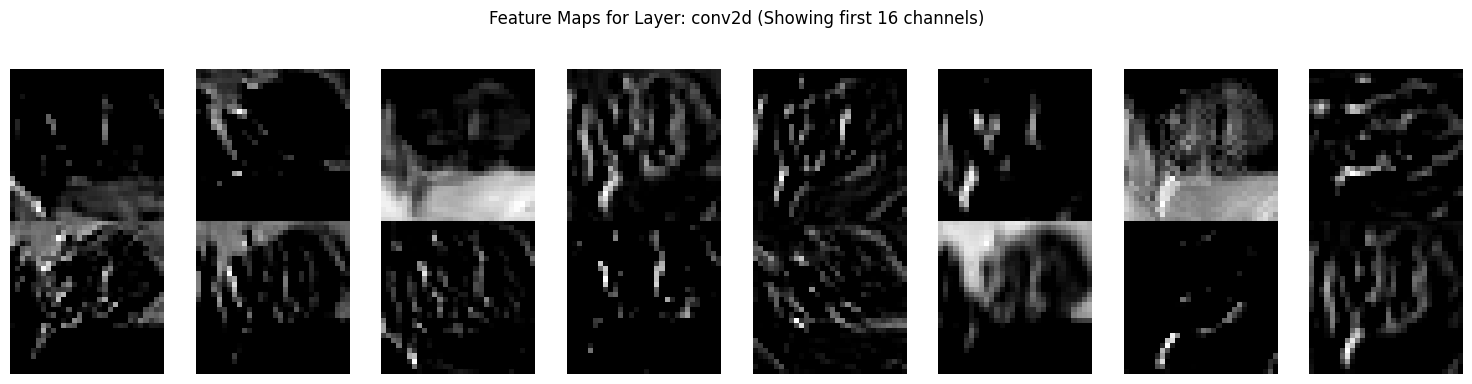

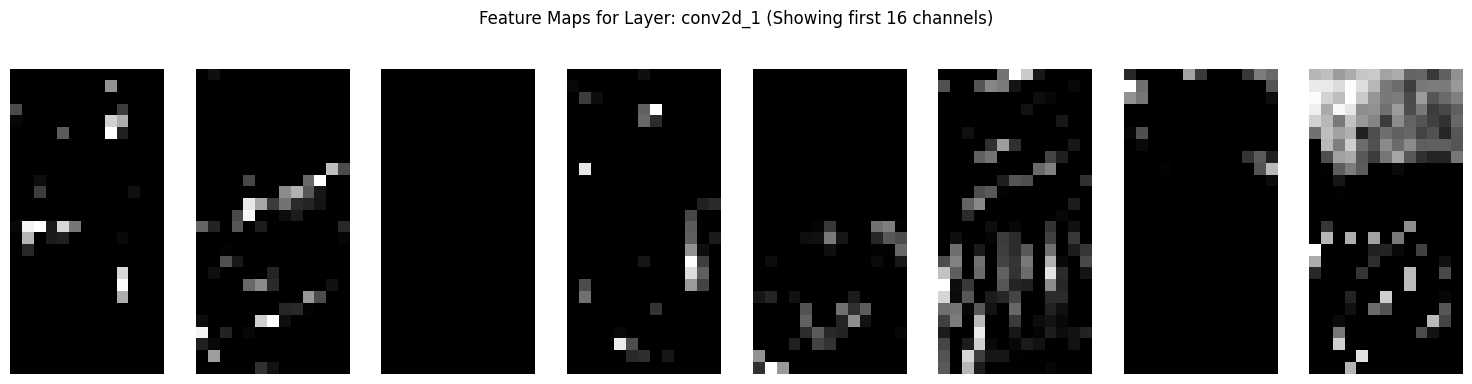

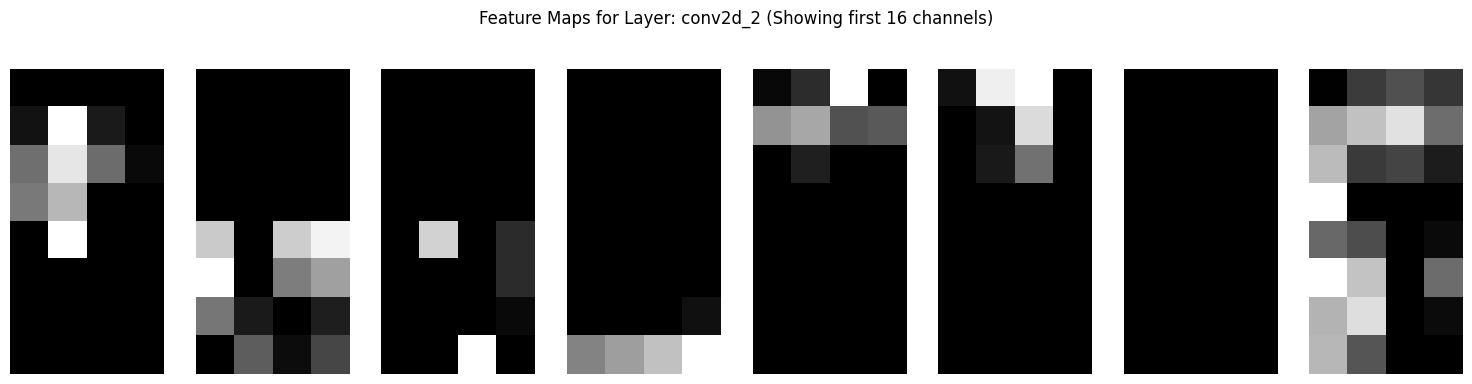

In [12]:
img = x_test[0]
img_tensor = np.expand_dims(img, axis=0)

layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = models.Model(inputs=model.layers[0].input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

for layer_idx, layer_activation in enumerate(activations):
    conv_layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]
    current_layer_name = conv_layer_names[layer_idx]
    n_features = layer_activation.shape[-1]
    display_cols = 8
    display_rows = 2
    plt.figure(figsize=(15, 4))
    for i in range(display_cols * display_rows):
        if i < n_features:
            plt.subplot(display_rows, display_cols, i + 1)
            plt.imshow(layer_activation[0, :, :, i], cmap='gray')
            plt.axis('off')

    plt.suptitle(f'Feature Maps for Layer: {current_layer_name} (Showing first 16 channels)')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()